# Alphabeta vs Monte Carlo Tree Search 
### paper

MCTS & Heuristiken Allgemein:
- Kato H., Fazekas S.Z., Takaya M., Yamamura A. (2015) Comparative Study of Monte-Carlo Tree Search and Alpha-Beta Pruning in Amazons. In: Khalil I., Neuhold E., Tjoa A., Xu L., You I. (eds) Information and Communication Technology. ICT-EurAsia 2015. Lecture Notes in Computer Science, vol 9357. Springer, Cham. https://doi.org/10.1007/978-3-319-24315-3_14

MCTS verbesserte UCB1 Formel:
- Kocsis, L., Szepesv ́ari, C.: Bandit based Monte Carlo planning. In: 17th EuropeanConference on Machine Learning (ECML 2006), pp. 282–293 (2006)

Territorial Evaluation Heuristik:
- Lieberum, J.: An evaluation function for the game of Amazons. Theoret. Comput.Sci.349, 230–244 (2005

Alpha Beta - Optimierung:
- Efficient implementation of Game Trees, Nicholas Gorski


In [12]:
import matplotlib
from matplotlib import pyplot as plt
from statistics import mean
import numpy as np
import pandas as pd

%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 160
matplotlib.rcParams['axes.prop_cycle'] = matplotlib.cycler(color=["g", "b", "r"]) 

In [14]:
#node 19 16 cores 4 real ones 16gb ram
data = {'Heuristik':  ['mobility evaluation', 'mobility evaluation', 'mobility evaluation'
        ,'territorial evaluation','territorial evaluation','territorial evaluation'],
        'erster Zug': ['AB', 'MCTS','Durchschnitt','AB','MCTS','Durchschnitt'],
        'Simulationen' : [50,50,100,50,50,100],
         1000 : [100*(9/50),100*(16/50),25.0,
                100*(2/50),100*(8/50),10.0],
         5000 : [100*(24/50),100*(26/50),50.0,
                100*(6/50),100*(9/50),15.0],
         10000 : [100*(24/50),100*(31/50),55.0,
                100*(12/50),100*(10/50),22.0],
         50000 : [100*(35/50),100*(39/50),74.0,
                100*(25/50),100*(23/50),48.0],
      #   70000 : [100*(38/50),100*(43/50),81.0,
       #         100*(25/50),100*(23/50),48.0],
         100000 : [100*(38/50),100*(40/50),75.0,
                100*(23/50),100*(27/50),50.0],
     }

df = pd.DataFrame (data, columns = ['Heuristik','erster Zug','Simulationen',1000,5000,
                                    10000,50000,100000])
df

,Heuristik,erster Zug,Simulationen,1000,5000,10000,50000,100000
0,mobility evaluation,AB,50,18.0,48.0,48.0,70.0,76.0
1,mobility evaluation,MCTS,50,32.0,52.0,62.0,78.0,80.0
2,mobility evaluation,Durchschnitt,100,25.0,50.0,55.0,74.0,75.0
3,territorial evaluation,AB,50,4.0,12.0,24.0,50.0,46.0
4,territorial evaluation,MCTS,50,16.0,18.0,20.0,46.0,54.0
5,territorial evaluation,Durchschnitt,100,10.0,15.0,22.0,48.0,50.0


In [15]:
tim = df.iloc[2::3,3:]
tim = tim.append(tim.mean(),6)
tim = tim.rename(index={0: 'mobility evaluation',1:'territorial evaluation',2:"mean"})
wins = tim.T
wins

,mobility evaluation,territorial evaluation,mean
1000,25.0,10.0,17.5
5000,50.0,15.0,32.5
10000,55.0,22.0,38.5
50000,74.0,48.0,61.0
100000,75.0,50.0,62.5


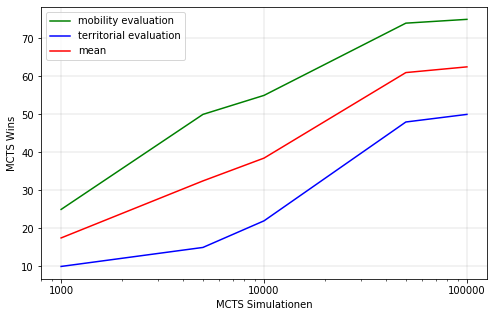

In [16]:
ax = wins.plot(logx=True, linestyle='-',figsize=(8, 5)); # Durchschnitt
ax.set_xlabel('MCTS Simulationen')
ax.set_ylabel('MCTS Wins')
ax.set_xticks([1000,10000,100000])
ax.grid(color='gray', linestyle='-', linewidth=.2)

ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

In [17]:
data = {'Heuristik':  ['mobility evaluation', 'mobility evaluation', 'mobility evaluation'
        ,'territorial evaluation','territorial evaluation','territorial evaluation'],
        'erster Zug': ['AB', 'MCTS','Durchschnitt','AB','MCTS','Durchschnitt'],
        1000 : [1057/50,775/50,(1057+775)/100,
                2316/50,1930/50,(2316+1930)/100],
        5000 : [1193/50,1256/50,(1193+1256)/100,
                2585/50,2710/50,(2585+2710)/100],
        10000 : [1467/50,1713/50,(1467+1713)/100,
                2708/50,3226/50,(2708+3226)/100],
        50000 : [3706/50,3880/50,(3706.+3880.)/100,
                4691/50,4836/50,(4691+4836)/100],
        100000 : [5792/50,6306/50,(5792+6306)/100,
                6220/50,6431/50,(6220+6431)/100],
        }

df = pd.DataFrame (data, columns = ['Heuristik','erster Zug',
                                    1000,5000,10000,50000,100000])
df

,Heuristik,erster Zug,1000,5000,10000,50000,100000
0,mobility evaluation,AB,21.14,23.86,29.34,74.12,115.84
1,mobility evaluation,MCTS,15.50,25.12,34.26,77.60,126.12
2,mobility evaluation,Durchschnitt,18.32,24.49,31.80,75.86,120.98
3,territorial evaluation,AB,46.32,51.70,54.16,93.82,124.40
4,territorial evaluation,MCTS,38.60,54.20,64.52,96.72,128.62
5,territorial evaluation,Durchschnitt,42.46,52.95,59.34,95.27,126.51


In [18]:
tim = df.iloc[2::3,2:]
tim = tim.append(tim.mean(),6)
tim = tim.rename(index={0: 'mobility evaluation time',1:'territorial evaluation time',2:"mean"})
tim = tim.T
tim

,mobility evaluation time,territorial evaluation time,mean
1000,18.32,42.46,30.390
5000,24.49,52.95,38.720
10000,31.80,59.34,45.570
50000,75.86,95.27,85.565
100000,120.98,126.51,123.745


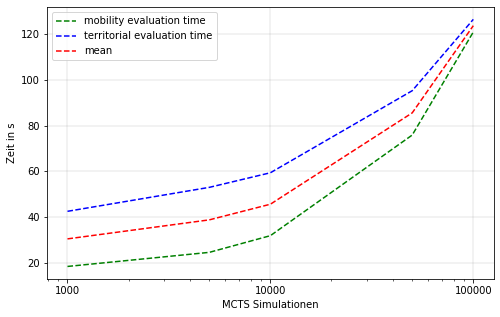

In [19]:
ax = tim.plot(logx=True, linestyle='--',figsize=(8, 5)); # Durchschnitt
ax.set_xlabel('MCTS Simulationen')
ax.set_ylabel('Zeit in s')
ax.set_xticks([1000,10000,100000])
ax.grid(color='gray', linestyle='-', linewidth=.2)

ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

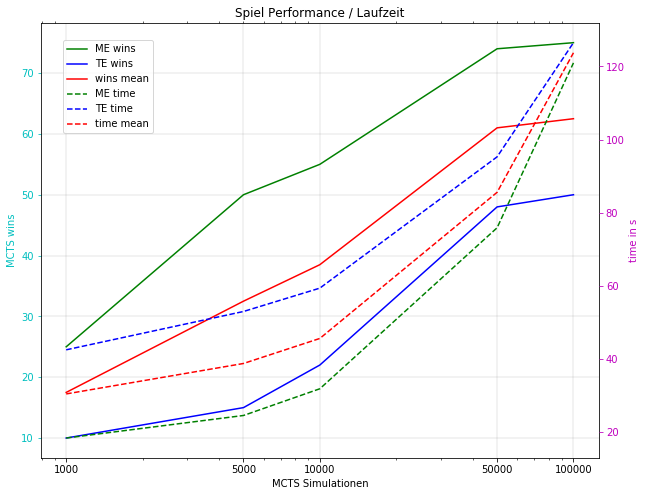

In [20]:
matplotlib.rcParams['axes.prop_cycle'] = matplotlib.cycler(color=["c", "m"]) 
fig = plt.figure(figsize=(10, 8))
ax=fig.add_subplot(111, label="1")
ax.set_title("Spiel Performance / Laufzeit")
ax2=fig.add_subplot(111, label="2", frame_on=False)
ax.set_prop_cycle(color=['green', 'blue','red'])
ax.semilogx(wins)
ax.set_xlabel("MCTS Simulationen",color="black")
ax.set_ylabel("MCTS wins", color="C0")
ax.tick_params(axis='y', colors="C0")

ax2.set_prop_cycle(color=['green', 'blue','red'])
ax2.semilogx(tim, ls="--")
ax2.xaxis.tick_top()
ax2.yaxis.tick_right()
ax2.set_ylabel('time in s', color="C1")       
ax2.xaxis.set_label_position('top') 
ax2.yaxis.set_label_position('right') 
ax2.set_xticks([])
ax2.tick_params(axis='y', colors="C1")
ax.set_xticks([1000,5000,10000,50000,100000])
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.grid(color='gray', linestyle='-', linewidth=.2)
fig.legend(["ME wins","TE wins","wins mean","ME time","TE time", "time mean"],bbox_to_anchor=(0.22,.8));



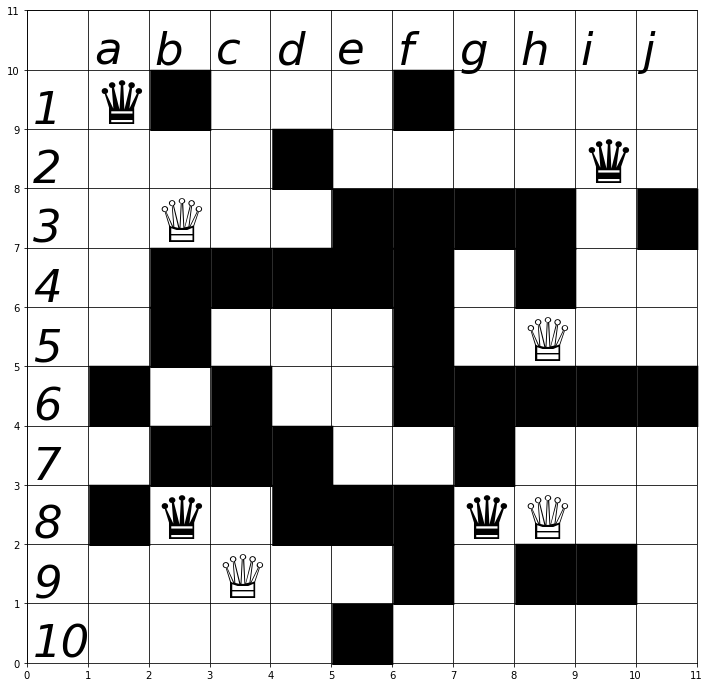

In [10]:
import matplotlib.pyplot as plt

chess = np.array([
        [2,-1,0,0,0,-1,0,0,0,0],
        [0,0,0,-1,0,0,0,0,2,0],
        [0,1,0,0,-1,-1,-1,-1,0,-1],
        [0,-1,-1,-1,-1,-1,0,-1,0,0],
        [0,-1,0,0,0,-1,0,1,0,0],
        [-1,0,-1,0,0,-1,-1,-1,-1,-1],
        [0,-1,-1,-1,0,0,-1,0,0,0],
        [-1,2,0,-1,-1,-1,2,1,0,0],
        [0,0,1,0,0,-1,0,-1,-1,0],
        [0,0,0,0,-1,0,0,0,0,0]
    ])
alphabet = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n']
zahlen = [1,2,3,4,5,6,7,8,9,10,11,12,13,14][:10]
zahlen.reverse()
_,fig = plt.subplots(figsize=(12, 12))
fig.set_xticks(np.arange(12))
fig.set_yticks(np.arange(12))
chess = np.flipud(chess).T
for x in range(-1,chess.shape[0]):
    for y in range(-1,chess.shape[0]):
        if x == -1 and y == -1:
            continue
        elif x == -1:
                plt.text(x+1.1, y+.1, zahlen[y], style='italic', fontsize=45)
                continue
        elif y == -1:
                plt.text(x+1.1,10+.1, alphabet[x], style='italic', fontsize=45)
                continue
        else:
            if chess[x,y] == 1:
                plt.text(x+1.1, y+.1, '♕', style='italic', fontsize=60)
            elif chess[x,y] == 2:
                plt.text(x+1.1, y+.1, '♛', style='italic', fontsize=60)
            elif chess[x,y] == -1:
                plt.text(x-.1+1, y+.15, '■', style='italic', fontsize=80)
fig.grid(True, c='black')
fig.figure.savefig('test.png')
